<a href="https://colab.research.google.com/github/visu21ab/computational_bias_detection/blob/main/code/6.a%20Polarization_Visual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Get Visuals on Polarity Score

pre-requisite files: 
- Datasets splitted by frame and country, contains top 20 most frequent aspects, mean sentiment score from flair analysis. 

In [5]:
!pip install scienceplots

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
# Importing the required library

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt 
import scienceplots

In [7]:
# Set science plot style
plt.style.use(['science', 'no-latex'])
plt.rcParams['figure.figsize'] = (6.4, 4.8)

In [67]:
# Load the datasets
df1 = pd.read_csv('drive/MyDrive/Master Thesis/ukraine_displacement_full_ABSA.csv')
df2 = pd.read_csv('drive/MyDrive/Master Thesis/syria_displacement_full_ABSA.csv')

## Create Heatmap

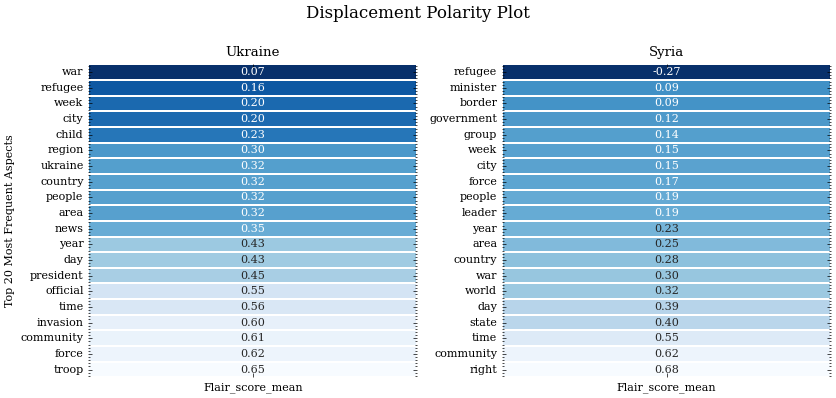

In [68]:
# Select the columns for which we want to create the heatmap
cols1 = ["Flair_score_mean"]

# Create a new dataframe with the scores as the columns and the aspects as the rows
table1 = pd.DataFrame(data=df1[cols1].values, index=df1["Aspect_lemm"].values, columns=cols1)

table1 = table1.sort_values(cols1, ascending=True)

# Normalize the values between 0 and 1
table_norm1 = (table1 - table1.min()) / (table1.max() - table1.min())

# Create the first heatmap
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8.5, 4))
cmap1 = sns.cubehelix_palette(as_cmap=True, dark=0.2, light=0.95, reverse=True)
sns.heatmap(table_norm1, cmap='Blues_r', annot=table1, fmt=".2f", cbar=False, linewidths=0.1, linecolor='white', square=False, ax=ax1)
ax1.set_title('Ukraine')
ax1.set_ylabel('Top 20 Most Frequent Aspects')

# Select the columns for which we want to create the heatmap
cols2 = ["Flair_score_mean"]

# Create a new dataframe with the scores as the columns and the aspects as the rows
table2 = pd.DataFrame(data=df2[cols2].values, index=df2["Aspect_lemm"].values, columns=cols2)

table2 = table2.sort_values(cols2, ascending=True)

# Normalize the values between 0 and 1
table_norm2 = (table2 - table2.min()) / (table2.max() - table2.min())

# Create the second heatmap
cmap2 = sns.cubehelix_palette(as_cmap=True, dark=0.2, light=0.95, reverse=True)
sns.heatmap(table_norm2, cmap='Blues_r', annot=table2, fmt=".2f", cbar=False, linewidths=0.1, linecolor='white', square=False, ax=ax2)
ax2.set_title('Syria')

# Adjust the spacing between the plots
plt.subplots_adjust(wspace=0.4)
plt.suptitle('Displacement Polarity Plot', fontsize=12, y=1)
plt.rcParams.update({'font.size':8})
fig.tight_layout()
plt.show()

## Barchart Common Aspects

In [69]:
# Read the data
df_barchart_u = df1
df_barchart_s = df2

In [70]:
# Add a column in the datasets referencing the country
df_barchart_s['Country'] = 'syria'
df_barchart_u['Country'] = 'ukraine'

In [65]:
# Filter dataset 1 to include only aspects that exist in dataset 2
dataset1_filtered = df_barchart_s[df_barchart_s['Aspect_lemm'].isin(df_barchart_u['Aspect_lemm'])]

# Filter dataset 2 to include only aspects that exist in dataset 1
dataset2_filtered = df_barchart_u[df_barchart_u['Aspect_lemm'].isin(df_barchart_s['Aspect_lemm'])]

# Concatenate the filtered datasets
merged_df_filtered = pd.concat([dataset1_filtered, dataset2_filtered])

<ipython-input-71-de9de19e4150>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  sns.barplot(x='Flair_score_mean', y='Aspect_lemm', hue='Country', palette='Blues', data=merged_df_filtered, estimator=np.median, ci=0, orient='h')


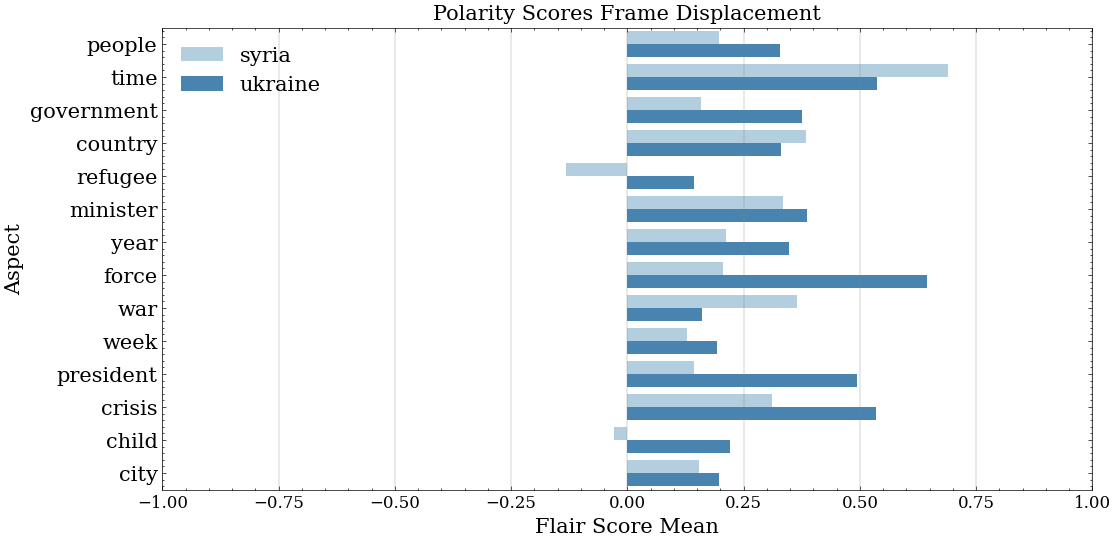

In [71]:
# Barplot creator
plt.figure(figsize=(12,6))
sns.barplot(x='Flair_score_mean', y='Aspect_lemm', hue='Country', palette='Blues', data=merged_df_filtered, estimator=np.median, ci=0, orient='h')

# Set the axis labels and title
plt.xlabel('Flair Score Mean', fontsize=15)
plt.ylabel('Aspect', fontsize=15)
plt.title('Polarity Scores Frame Displacement', fontsize=15)


# Set the font size of the y-axis tick labels
plt.tick_params(axis='y', labelsize=15)

# Set the font size of the y-axis tick labels
plt.tick_params(axis='x', labelsize=12)

# Set the font size of the legend
plt.legend(fontsize=15)

# Set the x-axis range to -1 to 1
plt.xlim(-1, 1)

# Add vertical lines at intervals of 0.25
for i in range(-4, 5):
    plt.axvline(i * 0.25, color='grey', linewidth=0.25)

# Show the plot
plt.show()
